In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ''
import pandas as pd
from keras.models import load_model
import glob
from PIL import Image
from tqdm import tqdm, tqdm_notebook
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, f1_score
import scikitplot as skplt
import matplotlib.pyplot as plt

/home/yannis/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# images = glob.glob("data/test/*.png")

In [3]:
resultat = pd.read_csv("resultats.csv")

In [83]:
mds = resultat.columns[1:]

In [84]:
roc_res = []
acc_res = []
for m in mds:
    r = (resultat[m] > 0.5).astype(np.int)
    roc = roc_auc_score(resultat["y_true"], resultat[m])
    acc = accuracy_score(resultat["y_true"], r)
    roc_res.append((roc, m))
    acc_res.append((acc, m, round((1-acc)*100, 2)))

In [81]:
sorted(acc_res, reverse=True)

[(0.888121546961326, 'DenseNet121_224x224_lightaug', 11.19),
 (0.8839779005524862, 'InceptionResNetV2_224x224_lightaug', 11.6),
 (0.8611878453038674, 'NASNetLarge_224x224_lightaug', 13.88),
 (0.8556629834254144, 'ResNet50_224x224_lightaug', 14.43),
 (0.830110497237569, 'NASNetMobile_224x224_lightaug', 16.99)]

In [85]:
sorted(acc_res, reverse=True)

[(0.9019337016574586, 'DenseNet121_224x224', 9.81),
 (0.8964088397790055, 'NASNetLarge_224x224_noaug', 10.36),
 (0.8915745856353591, 'NASNetMobile_224x224_noaug', 10.84),
 (0.8908839779005525, 'DenseNet121_224x224_noaug', 10.91),
 (0.8770718232044199, 'NASNetLarge_96x96', 12.29),
 (0.875, 'InceptionResNetV2_96x96_noaug', 12.5),
 (0.8674033149171271, 'DenseNet121_96x96_noaug', 13.26),
 (0.8667127071823204, 'NASNetMobile_96x96_noaug', 13.33),
 (0.861878453038674, 'NASNetMobile_224x224', 13.81),
 (0.8611878453038674, 'InceptionResNetV2_96x96', 13.88),
 (0.8598066298342542, 'InceptionResNetV2_224x224_noaug', 14.02),
 (0.856353591160221, 'InceptionResNetV2_224x224', 14.36),
 (0.8549723756906077, 'DenseNet121_96x96', 14.5),
 (0.8535911602209945, 'ResNet50_96x96_noaug', 14.64),
 (0.8480662983425414, 'ResNet50_224x224', 15.19),
 (0.8459944751381215, 'NASNetMobile_96x96', 15.4),
 (0.8439226519337016, 'ResNet50_224x224_noaug', 15.61),
 (0.8439226519337016, 'NASNetLarge_96x96_noaug', 15.61),
 (0.

In [13]:
sorted(roc_res, reverse=True)

[(0.9153159130521475, 'InceptionResNetV2_224x224_lightaug'),
 (0.901207341682509, 'NASNetLarge_224x224_lightaug'),
 (0.8556638832261324, 'ResNet50_224x224_lightaug'),
 (0.8448865023187698, 'NASNetMobile_224x224_lightaug'),
 (0.8327460491531076, 'DenseNet121_224x224_lightaug')]

In [29]:
sorted(roc_res, reverse=True)

[(0.9242919071667004, 'DenseNet121_224x224'),
 (0.9188138349255897, 'NASNetLarge_224x224_noaug'),
 (0.9178461051886126, 'DenseNet121_224x224_noaug'),
 (0.9095421933603083, 'InceptionResNetV2_224x224_noaug'),
 (0.8986358964133839, 'InceptionResNetV2_224x224'),
 (0.876244039781771, 'NASNetMobile_224x224'),
 (0.8541633005256336, 'NASNetMobile_224x224_noaug'),
 (0.8538212433006631, 'NASNetLarge_96x96_noaug'),
 (0.8240932045777226, 'DenseNet121_96x96_noaug'),
 (0.8205007442752684, 'NASNetMobile_96x96_noaug'),
 (0.8046818867807773, 'InceptionResNetV2_96x96_noaug'),
 (0.7980470079446659, 'ResNet50_96x96_noaug'),
 (0.7844970727464617, 'InceptionResNetV2_96x96'),
 (0.778111431586836, 'DenseNet121_96x96'),
 (0.7715349946886592, 'ResNet50_224x224'),
 (0.770254428695679, 'NASNetMobile_96x96'),
 (0.7649241801799325, 'NASNetLarge_96x96'),
 (0.7579747462072901, 'ResNet50_224x224_noaug'),
 (0.6913835956917979, 'ResNet50_96x96')]

In [8]:
models = glob.glob("../models/dataset-1/vanilla/*_224x224_lightaug/*")

In [11]:
for m in models:
    model = load_model(m, compile=False)
    print(m.split("/")[-2], " => ", model.count_params())

NASNetMobile_224x224_lightaug  =>  4271830
InceptionResNetV2_224x224_lightaug  =>  54339810
NASNetLarge_224x224_lightaug  =>  84924884
ResNet50_224x224_lightaug  =>  23591810
DenseNet121_224x224_lightaug  =>  7039554


In [2]:
model = load_model("../models/dataset-1/Comparaison/Mobilnet_only_pgan_224x224/best_model_epoch.hdf5", compile=False)

In [3]:
print("Mobilnet_v2 => ", model.count_params())

Mobilnet_v2 =>  2260546


In [ ]:
23 591 810

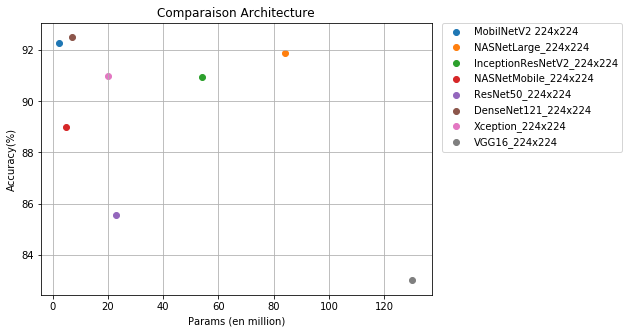

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
    
ax.scatter(2.2, 92.30, label="MobilNetV2 224x224")
ax.scatter(84, 91.88, label="NASNetLarge_224x224")
ax.scatter(54, 90.95, label="InceptionResNetV2_224x224")
ax.scatter(5, 88.98, label="NASNetMobile_224x224")
ax.scatter(23, 85.56, label="ResNet50_224x224")
ax.scatter(7, 92.5, label="DenseNet121_224x224")
ax.scatter(20, 91, label="Xception_224x224")
ax.scatter(130, 83, label="VGG16_224x224")
#ax.scatter(0, 0, label="")
#ax.scatter(0, 0, label="")
#ax.scatter(0, 0, label="")

ax.legend(loc='upper right', bbox_to_anchor=(1.5,1.02), ncol=1)
ax.set_title("Comparaison Architecture")
ax.set_ylabel("Accuracy(%)")
ax.set_xlabel("Params (en million)")
ax.grid(True)

In [34]:
[(0.9242919071667004, 'DenseNet121_224x224'),
 (0.9188138349255897, 'NASNetLarge_224x224_noaug'),
 (0.9178461051886126, 'DenseNet121_224x224_noaug'),
 (0.9095421933603083, 'InceptionResNetV2_224x224_noaug'),
 (0.8986358964133839, 'InceptionResNetV2_224x224'),
 (0.876244039781771, 'NASNetMobile_224x224'),
 (0.8541633005256336, 'NASNetMobile_224x224_noaug'),
 (0.8538212433006631, 'NASNetLarge_96x96_noaug'),
 (0.8240932045777226, 'DenseNet121_96x96_noaug'),
 (0.8205007442752684, 'NASNetMobile_96x96_noaug'),
 (0.8046818867807773, 'InceptionResNetV2_96x96_noaug'),
 (0.7980470079446659, 'ResNet50_96x96_noaug'),
 (0.7844970727464617, 'InceptionResNetV2_96x96'),
 (0.778111431586836, 'DenseNet121_96x96'),
 (0.7715349946886592, 'ResNet50_224x224'),
 (0.770254428695679, 'NASNetMobile_96x96'),
 (0.7649241801799325, 'NASNetLarge_96x96'),
 (0.7579747462072901, 'ResNet50_224x224_noaug'),
 (0.6913835956917979, 'ResNet50_96x96')]

[(0.9242919071667004, 'DenseNet121_224x224'),
 (0.9188138349255897, 'NASNetLarge_224x224_noaug'),
 (0.9178461051886126, 'DenseNet121_224x224_noaug'),
 (0.9095421933603083, 'InceptionResNetV2_224x224_noaug'),
 (0.8986358964133839, 'InceptionResNetV2_224x224'),
 (0.876244039781771, 'NASNetMobile_224x224'),
 (0.8541633005256336, 'NASNetMobile_224x224_noaug'),
 (0.8538212433006631, 'NASNetLarge_96x96_noaug'),
 (0.8240932045777226, 'DenseNet121_96x96_noaug'),
 (0.8205007442752684, 'NASNetMobile_96x96_noaug'),
 (0.8046818867807773, 'InceptionResNetV2_96x96_noaug'),
 (0.7980470079446659, 'ResNet50_96x96_noaug'),
 (0.7844970727464617, 'InceptionResNetV2_96x96'),
 (0.778111431586836, 'DenseNet121_96x96'),
 (0.7715349946886592, 'ResNet50_224x224'),
 (0.770254428695679, 'NASNetMobile_96x96'),
 (0.7649241801799325, 'NASNetLarge_96x96'),
 (0.7579747462072901, 'ResNet50_224x224_noaug'),
 (0.6913835956917979, 'ResNet50_96x96')]

In [ ]:
[(0.9153159130521475, 'InceptionResNetV2_224x224_lightaug'),
 (0.901207341682509, 'NASNetLarge_224x224_lightaug'),
 (0.8556638832261324, 'ResNet50_224x224_lightaug'),
 (0.8448865023187698, 'NASNetMobile_224x224_lightaug'),
 (0.8327460491531076, 'DenseNet121_224x224_lightaug')]

### Result patch3

In [3]:
resultat = pd.read_csv("resultat_patch3.csv")
mds = resultat.columns[1:]

In [45]:
y_true  = [ list(resultat["y_test"][x:x+3]) for x in range(0, len(resultat["y_test"]), 3)]
y_true = [ most_common(x) for x in y_true]

In [46]:
def most_common(lst):
        return max(set(lst), key=lst.count)

In [47]:
roc_res = []
acc_res = []
for m in mds:
    r = (resultat[m] > 0.5).astype(np.int)
#     roc = roc_auc_score(resultat["y_test"], resultat[m])
    pred = [ list(resultat[m][x:x+3]) for x in range(0, len(resultat[m]), 3)]


    real_pred = []
    for pr in pred:
        p = (np.array(pr) > 0.5).astype(np.int)
        real_pred.append(most_common(list(p)))
    
    
    acc = accuracy_score(y_true, real_pred)
#     roc_res.append((roc, m))
    acc_res.append((acc, m, round((1-acc)*100, 2)))

In [48]:
sorted(acc_res, reverse=True)

[(0.919889502762431, 'NASNetLarge_224x224_noaug', 8.01),
 (0.9095303867403315, 'NASNetLarge_224x224_lightaug', 9.05),
 (0.9060773480662984, 'InceptionResNetV2_224x224_noaug', 9.39),
 (0.9033149171270718, 'DenseNet121_224x224_lightaug', 9.67),
 (0.8957182320441989, 'DenseNet121_224x224_noaug', 10.43),
 (0.8950276243093923, 'NASNetMobile_224x224_lightaug', 10.5),
 (0.8874309392265194, 'ResNet50_224x224_lightaug', 11.26),
 (0.8825966850828729, 'ResNet50_224x224_noaug', 11.74),
 (0.8756906077348067, 'NASNetMobile_224x224_noaug', 12.43),
 (0.8743093922651933, 'DenseNet121_96x96_lightaug', 12.57),
 (0.8701657458563536, 'InceptionResNetV2_96x96_lightaug', 12.98),
 (0.8570441988950276, 'InceptionResNetV2_224x224_lightaug', 14.3),
 (0.8522099447513812, 'NASNetMobile_96x96_lightaug', 14.78),
 (0.8259668508287292, 'ResNet50_96x96_lightaug', 17.4)]

### Resultat patch 5

In [8]:
resultat = pd.read_csv("resultat_patch5.csv")
mds = resultat.columns[1:]
def most_common(lst):
    return max(set(lst), key=lst.count)

In [9]:
y_true  = [ list(resultat["y_test"][x:x+5]) for x in range(0, len(resultat["y_test"]), 5)]
y_true = [ most_common(x) for x in y_true]

In [11]:
roc_res = []
acc_res = []
for m in mds:
    r = (resultat[m] > 0.5).astype(np.int)
#     roc = roc_auc_score(resultat["y_test"], resultat[m])
    pred = [ list(resultat[m][x:x+5]) for x in range(0, len(resultat[m]), 5)]


    real_pred = []
    for pr in pred:
        p = (np.array(pr) > 0.5).astype(np.int)
        real_pred.append(most_common(list(p)))
    
    
    acc = accuracy_score(y_true, real_pred)
#     roc_res.append((roc, m))
    acc_res.append((acc, m, round((1-acc)*100, 2)))

In [12]:
sorted(acc_res, reverse=True)

[(0.8770718232044199, 'MobileNetV2_224x224', 12.29),
 (0.869475138121547, 'DenseNet121_224x224', 13.05),
 (0.8535911602209945, 'DenseNet121_224x224_multi', 14.64)]

### Test by patient

In [18]:
best_model = load_model("../models/dataset-1/vanilla/DenseNet121_224x224/model.hdf5")

In [88]:
test = pd.read_csv("test.csv")

In [50]:
test_drop = test.drop_duplicates("seq", keep="first")

In [51]:
seq_label = [(x[1]["seq"],x[1]["label"]) for x in test_drop.iterrows()]

In [79]:
def get_images(images):
    imgs = []
    for i in images:
        imgs.append(np.array(Image.open("data/orig_test/"+i).resize((224,224))))
    return np.array(imgs)

for seq in seq_label[0:]:
    
    images = get_images(list(test[test["seq"] == seq[0]]["name"]))
    
    
    pred = best_model.predict(images, verbose=1)
    
    print(seq)
    break

57/57 [==============================] - 4s 78ms/step
('SOB_B_F_14-23060CD', 0)


In [80]:
(pred[:,1] > 0.5).astype(np.int)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Predict Norm

In [3]:
test = pd.read_csv("test.csv")
x_test_96 = []
x_test_224 = []
y_test = []
for img in tqdm(test.iterrows()):
    i = img[1]
    y_test.append(i["label"])
    mi = Image.open("data/norm_orig_test/"+i["name"])
    
    m = mi.resize((224,224))
    x_test_224.append(np.array(m)*(1/255))

x_test_224 = np.array(x_test_224)
y_test = np.array(y_test)

1448it [00:16, 87.04it/s]


In [2]:
best_model = load_model("../models/dataset-1/norm/DenseNet121_224x224/model.hdf5")

In [4]:
pred = best_model.predict(x_test_224, verbose=1)

1448/1448 [==============================] - 121s 84ms/step


In [9]:
accuracy_score(y_test, (pred[:,1] >= 0.5).astype(np.int))

0.8791436464088398

## Predict Compare 

In [4]:
test = glob.glob("data/original/patch3_train/*/*.png")
x_test_96 = []
x_test_224 = []
y_test = []
for img in tqdm(test):
    y_test.append(img.split("/")[-2])
    mi = Image.open("data/original/patch3_train/"+str(img.split("/")[-2])+"/"+img.split("/")[-1])
    
    m = mi.resize((224,224))
    x_test_224.append(np.array(m)*(1/255))

x_test_224 = np.array(x_test_224)
y_test = np.array(y_test).astype(np.int)

In [7]:
model = load_model("../models/dataset-1/Compare/DenseNet121_224x224_weights/model.hdf5")

In [12]:
pred = model.predict(x_test_224, verbose=1)
accuracy_score(y_test, (pred[:,1] >= 0.5).astype(np.int))

0.903049421661409

In [15]:
# pred3 = modelp3.predict(x_test_224, verbose=1)
# accuracy_score(y_test, (pred3[:,1] >= 0.5).astype(np.int))

In [2]:
modelp3 = load_model("../models/dataset-1/Compare/DenseNet121_224x224_weights_p3/model.hdf5")

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train = glob.glob("data/original/patch3_train/*/*.png")

In [32]:
idx = 0
contradictions = []
for x in tqdm(range(0,12)):
    x_test_224 = []
    y_test = []
    for i in range(0,1581):
        y_test.append(train[idx].split("/")[-2])
        mi = Image.open("data/original/patch3_train/"+str(train[idx].split("/")[-2])+"/"+train[idx].split("/")[-1])

        m = mi.resize((224,224))
        x_test_224.append(np.array(m)*(1/255))
        idx = idx + 1
    x_test_224 = np.array(x_test_224)
    y_test = np.array(y_test).astype(np.int)
    
    
    pred = modelp3.predict(x_test_224)
    diff = 1-(y_test == (pred[:,1] >= 0.5).astype(np.int))
    error = np.where(diff)[0]
    contradictions.append(error)



  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:15<02:52, 15.69s/it]

 17%|█▋        | 2/12 [00:31<02:37, 15.75s/it]

 25%|██▌       | 3/12 [00:47<02:22, 15.80s/it]

 33%|███▎      | 4/12 [01:03<02:06, 15.85s/it]

 42%|████▏     | 5/12 [01:19<01:50, 15.82s/it]

 50%|█████     | 6/12 [01:35<01:35, 15.83s/it]

 58%|█████▊    | 7/12 [01:50<01:18, 15.76s/it]

 67%|██████▋   | 8/12 [02:06<01:02, 15.65s/it]

 75%|███████▌  | 9/12 [02:21<00:46, 15.57s/it]

 83%|████████▎ | 10/12 [02:36<00:31, 15.51s/it]

 92%|█████████▏| 11/12 [02:52<00:15, 15.47s/it]

100%|██████████| 12/12 [03:07<00:00, 15.44s/it]



In [35]:
contradictions_idx = []
for x in range(0,12):
    for m in contradictions[x]:
        plus = x*1581
        contradictions_idx.append(m+plus)

In [37]:
len(contradictions_idx)

589

In [49]:
x_contrad = []
y_test_contrad = []
for x in contradictions_idx:
    img = train[x]
    y_test_contrad.append(img.split("/")[-2])
    mi = Image.open("data/original/patch3_train/"+str(img.split("/")[-2])+"/"+img.split("/")[-1])
    
    m = mi.resize((224,224))
    x_contrad.append(np.array(m)*(1/255))

x_contrad = np.array(x_contrad)
y_test_contrad = np.array(y_test_contrad).astype(np.int)

In [50]:
predc = modelp3.predict(x_contrad, verbose=1)

589/589 [==============================] - 1s 2ms/step


In [51]:
accuracy_score(y_test_contrad, (predc[:,1] >= 0.5).astype(np.int))

0.0

In [9]:
pred[:,1] > 0.5)

array([[2.5120394e-07, 9.9999976e-01],
       [2.5120394e-07, 9.9999976e-01],
       [2.5120394e-07, 9.9999976e-01],
       ...,
       [2.5120394e-07, 9.9999976e-01],
       [2.5120394e-07, 9.9999976e-01],
       [2.5120394e-07, 9.9999976e-01]], dtype=float32)

In [14]:
len(train)

18972

In [19]:
18972 / 12

1581.0

In [99]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [96]:
len(train)

6461

In [100]:
len(test)

1448

In [26]:
resultat = pd.read_csv("resultats.csv")

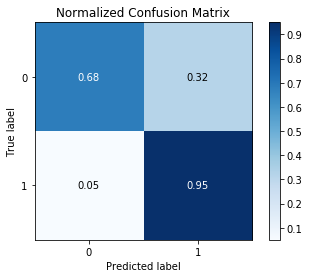

In [59]:
skplt.metrics.plot_confusion_matrix(resultat["y_true"], (resultat["DenseNet121_224x224"] > 0.5).astype(np.int), normalize=True)

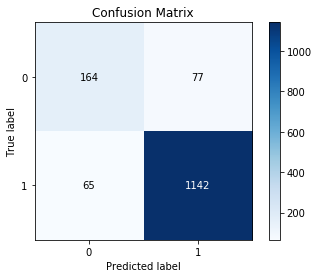

In [58]:
skplt.metrics.plot_confusion_matrix(resultat["y_true"], (resultat["DenseNet121_224x224"] > 0.5).astype(np.int))

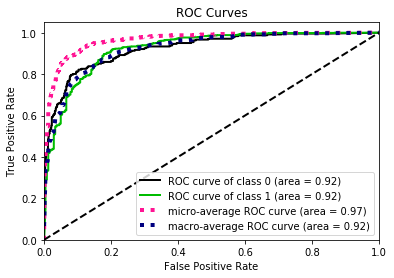

In [35]:
skplt.metrics.plot_roc(resultat["y_true"], [ [1-x, x] for x in resultat["DenseNet121_224x224"]])

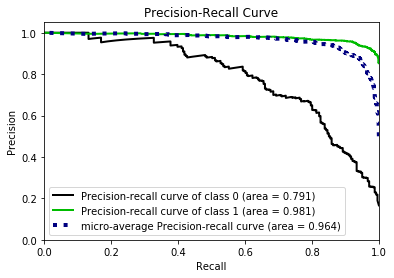

In [39]:
skplt.metrics.plot_precision_recall(resultat["y_true"], 
                                          [[1-x, x] for x in resultat["DenseNet121_224x224"]])


In [47]:
#auc(precision_recall_curve(resultat["y_true"], resultat["DenseNet121_224x224"]))

In [46]:
precision, recall, thresholds = precision_recall_curve(
    resultat["y_true"], 
    resultat["DenseNet121_224x224"])
area = auc(recall, precision)

In [48]:
print(area)

0.9810742117197426


In [54]:
f1_score(resultat["y_true"], (resultat["DenseNet121_224x224"] > 0.5).astype(np.int), average='binary')  

0.9414674361088212

In [16]:
all_models = glob.glob("../models/dataset-1/vanilla/*_noaug/*")

In [22]:
for m in all_models:
    model = load_model(m, compile=False)
    print(m.split("/")[-2], " => ", model.count_params())

NASNetLarge_224x224_noaug  =>  84924884
DenseNet121_96x96_noaug  =>  7039554
NASNetMobile_224x224_noaug  =>  4271830
ResNet50_96x96_noaug  =>  23591810
NASNetMobile_96x96_noaug  =>  4271830
ResNet50_224x224_noaug  =>  23591810
InceptionResNetV2_96x96_noaug  =>  54339810
NASNetLarge_96x96_noaug  =>  84924884
InceptionResNetV2_224x224_noaug  =>  54339810
DenseNet121_224x224_noaug  =>  7039554


In [6]:
res = {}
res["y_true"] = pd.read_csv("resultat.csv")["y_true"]

In [2]:
for m in all_models:
    model = load_model(m, compile=False)
    if "224x224" in m:
        pred = model.predict(x_test_224, verbose=1)
    if "96x96" in m:
        pred = model.predict(x_test_96, verbose=1)
    
    res[m.split("/")[-2]] = pred[:,1]

'"for m in all_models:\n    model = load_model(m, compile=False)\n    if "224x224" in m:\n        pred = model.predict(x_test_224, verbose=1)\n    if "96x96" in m:\n        pred = model.predict(x_test_96, verbose=1)\n    \n    res[m.split("/")[-2]] = pred[:,1]'

In [17]:
res = pd.DataFrame(res)

In [19]:
res.to_csv("resultat.csv", index=False)

In [23]:
pred = model.predict(x_test_224, verbose=1)

1448/1448 [==============================] - 13s 9ms/step


In [38]:
roc_auc_score(y_test, pred[:,1])

0.9188138349255897

--------------------------------------
best result for max FRR  0.029 , threeshold =  0.9199999999999997
 FRR :  0.027340513670256836
 FAR :  0.43983402489626555
--------------------------------------
accuracy :  0.9040055248618785


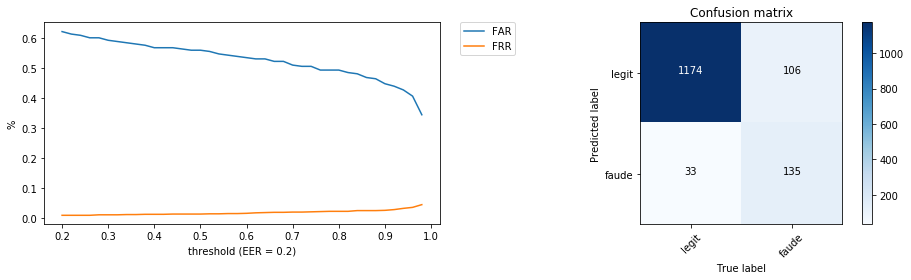

In [36]:
calcul_curve(1-pred,1-y_test)

In [32]:
ids = [x.split("/")[-1] for x in images]

In [47]:
df = pd.DataFrame({'name':ids, 'label':np.round(pred[:,1],4)})
df.to_csv("soumission_1.csv", index=False)
df.head()

,name,label
0,SOB_M_DC-14-18650-400-015.png,1.0000
1,SOB_B_F-14-21998EF-40-014.png,0.0000
2,SOB_B_F-14-21998CD-200-024.png,0.0001
3,SOB_M_DC-14-13412-100-025.png,1.0000
4,SOB_B_TA-14-16184CD-100-037.png,0.0112


In [35]:
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, recall_score, precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve



def plot_confusion_matrix(cm, classes=["legit","faude"],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    #plt.tight_layout()

def calcul_curve(prediction16, y_true, max_frr = 0.029):
    list_FAR = []
    list_FRR = []
    t = np.arange(0.2, 1.0, 0.02)
    EER = 1
    best_frr = [0.0,1.0,0.0]
    for x in t:
        y_pred = (prediction16[:,0] < x).astype(np.int)
        cm = confusion_matrix(y_true, y_pred).T
        TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        FRR = FN / float(FN + TP)
        FAR = FP / float(TN + FP)
        list_FAR.append(FAR)
        list_FRR.append(FRR)
        EER = x if FAR - FRR < EER and FAR - FRR > 0 else EER

    for x, v in enumerate(list_FRR):
        if v < max_frr and v > 0:
            best_frr = [t[x], v, list_FAR[x]]

    print("--------------------------------------")
    print("best result for max FRR ", max_frr,", threeshold = ", best_frr[0])
    print(" FRR : ", best_frr[1])
    print(" FAR : ", best_frr[2])
    print("--------------------------------------")
    
    plt.figure(figsize=(13, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, list_FAR, label="FAR") # plotting t, a separately 
    plt.plot(t, list_FRR,  label="FRR") # plotting t, b separately
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('%')
    plt.xlabel('threshold (EER = '+str(EER)+')')
    
    plt.subplot(1, 2, 2)
    calcul_score(prediction16, y_true, best_frr[0], False)
    
    plt.tight_layout()	


def calcul_score(prediction, y_true, threshold, text=True):
    
    def compute_FRR(TP, FP, FN, TN):
        FRR = FN / float(FN + TP)
        return FRR

    def compute_FAR(TP, FP, FN, TN):
        FAR = FP / float(TN + FP)
        return FAR

    y_pred = (prediction[:,0] < threshold).astype(np.int)
    cm = confusion_matrix(y_true, y_pred).T
    acc = accuracy_score(y_true, y_pred)
    plot_confusion_matrix(cm)
    if text :
        print("====== Accuracy : ", acc)
        TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        print(" ==== FRR :", compute_FRR(TP, FP, FN, TN))
        print(" ==== FAR :", compute_FAR(TP, FP, FN, TN))
    else:
        print("accuracy : ", acc)


# def calcul_curve(prediction16, y_true):
#     list_FAR = []
#     list_FRR = []
#     t = np.arange(0.0, 1.01, 0.05)
#     EER = 1
#     for x in t:
#         y_pred = (prediction16[:,0] < x).astype(np.int)
#         cm = confusion_matrix(y_true, y_pred).T
#         TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
#         FRR = FN / float(FN + TP)
#         FAR = FP / float(TN + FP)
#         list_FAR.append(FAR)
#         list_FRR.append(FRR)
#         EER = x if FAR - FRR < EER and FAR - FRR > 0 else EER
#     plt.plot(t, list_FAR, label="FAR") # plotting t, a separately 
#     plt.plot(t, list_FRR,  label="FRR") # plotting t, b separately
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.ylabel('%')
#     plt.xlabel('threshold (EER = '+str(EER)+')')
#     plt.show()

def calcul_softmax(threshold = 0.5):
    y_pred = 1-(prediction[:,0] < threshold).astype(np.int)
    return y_pred

def calcul_sigmoid(threshold = 0.5):
    y_pred = np.where(prediction > threshold, 1, 0)
    return y_pred




def show_error(prediction, y_true, images, type_error, threshold=0.5):
    def plot_figures(figures, nrows = 1, ncols=1):
        """Plot a dictionary of figures.

        Parameters
        ----------
        figures : <title, figure> dictionary
        ncols : number of columns of subplots wanted in the display
        nrows : number of rows of subplots wanted in the figure
        """

        fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
        fig.set_size_inches(25,25)
        for ind,title in enumerate(figures):
            axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
            axeslist.ravel()[ind].set_title(title)
            axeslist.ravel()[ind].set_axis_off()
        plt.tight_layout() # optionalplt.imshow(x[10])

    
    
    y_pred = (prediction[:,0] < threshold).astype(np.int)
    errors = np.where( (y_pred == y_true[0:]) == False )[0]
    
    img_error = []
    
    for index in errors:
        if type_error == "FN" and y_true[index] == 1:
            img_error.append([index,images[index]])
        if type_error == "FP" and y_true[index] == 0:
            img_error.append([index, images[index]])
        if len(img_error) == 100:
            break
    
    # generation of a dictionary of (title, images)
    number_of_im = len(img_error)
    figures = {type_error+' '+str(img[0]): img[1] for img in img_error}

    # plot of the images in a figure, with 2 rows and 3 columns
    plot_figures(figures, 10, 10)





def compare_model(list_predictions, name, y_true):
    models_FAR = []
    models_FRR = []
    t = np.arange(0.0, 1.01, 0.5)
    
    for preds in list_predictions:
        list_FAR=[]
        list_FRR=[]
        for x in t:
            y_pred = (preds[:,0] < x).astype(np.int)
            cm = confusion_matrix(y_true, y_pred).T
            TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
            FRR = FN / float(FN + TP)
            FAR = FP / float(TN + FP)
            list_FAR.append(FAR)
            list_FRR.append(FRR)
        models_FAR.append(list_FAR)
        models_FRR.append(list_FRR)
    
    
    for i, far in enumerate(models_FAR):
        plt.plot(t, far, label="FAR - "+name[i])
    plt.legend(loc=9)
    plt.show()
    
    for i, frr in enumerate(models_FRR):
        plt.plot(t, frr, label="FRR - "+name[i])
        
    plt.legend(loc=9)
    plt.show()
    
# from keras.models import load_model
# from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, recall_score, precision_score
# from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# import numpy as np
# import h5py


# class EvalModel:
#     def __init__(self, path_model, size=(224, 224, 3) ):
#         print("loading model ...")
#         self.Model = load_model(path_model)
#         self.batch_size_test = 1
#         self.steps = 100
#         #self.TP, self.FP, self.FN, self.TN = None,None,None,None
#         self.test_generator = None
#         self.test_set = None
#         self.size = size
    
#     def set_test_generator(self, path_csv, path_test):
#         test_datagen = ImageDataGenerator(rescale=1./255)
#         self.path_csv=path_csv
#         self.test_generator = test_datagen.flow_from_dataframe(
#             pd.read_csv(path_csv),
#             path_test,
#             x_col="name",
#             y_col="label",
#             has_ext=True,
#             target_size=self.size[:-1],
#             batch_size=self.batch_size_test,
#             class_mode="categorical",
#             shuffle=True
#         )
    
    
#     def set_test_h5(self, path):
#         self.test_set = h5py.File(path,'r')
    
#     def run_test(self):
        
#         images = self.test_set["images"]
        
#         y_pred = self.Model.predict(images, verbose=1)

#         y_true = self.test_set["labels"]
        
#         acc, FPR, FAR = self.calcul_scores(y_true, y_pred)
#         print("acc : ", acc)
#         print("FPR : ", FPR)
#         print("FAR : ", FAR)
    
    
#     def calcul_scores(self, y_true, y_pred, threshold=0.1):
#         print(y_pred.shape[1])
        
#         if y_pred.shape[1] == 2 :
#             y_pred = 1-(y_pred[:,0] < threshold).astype(np.int)
        
#         if y_pred.shape[1] == 1 :
#             y_pred = 1-np.where(y_pred > threshold, 0, 1)
            
# #             y_pred = 1 - np.argmax(y_pred, axis=1)
# #         y_pred = K.cast(y_pred >= threshold, 'float32')
# #         y_pred = (y_pred > threshold).astype(int)
# #         print(y_pred)
# #         y_pred = np.where(y_pred > threshold, 1, 0)

# #         y_pred = (y_pred[:,0] < threshold).astype(np.int)
#         #
# #         print(y_pred)
        
#         cm = confusion_matrix(y_true, y_pred)
#         print(cm)
#         acc = accuracy_score(y_true, y_pred)
#         TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
#         FPR = self.compute_FRR(TP, FP, FN, TN)
#         FAR = self.compute_FAR(TP, FP, FN, TN)
#         return acc, FPR, FAR
    
    
#     # false recognition rate (FRR) : FRR = FNR = FN/(FN + TP)
#     def compute_FRR(self, TP, FP, FN, TN):
#         FRR = FN / float(FN + TP)
#         return FRR

#     # false acceptance rate (FAR) : FAR = FPR = FP/(FP + TN)
#     def compute_FAR(self, TP, FP, FN, TN):
#         FAR = FP / float(TN + FP)
#         return FAR



In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import pandas as pd
from keras.models import load_model
import glob
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

test = pd.read_csv("test.csv")

x_test_96 = []
x_test_224 = []
y_test = []

for img in tqdm(test.iterrows()):
    i = img[1]
    y_test.append(i["label"])
    mi = Image.open("data/orig_test/"+i["name"])
    
    m = mi.resize((224,224))
    x_test_224.append(np.array(m)*(1/255))

    m = mi.resize((96,96))
    x_test_96.append(np.array(m)*(1/255))

x_test_96 = np.array(x_test_96)
x_test_224 = np.array(x_test_224)
y_test = np.array(y_test)


all_models = glob.glob("../models/dataset-1/patch9/*/*")

res = {}
res["y_true"] = y_test

for m in all_models:
    model = load_model(m, compile=False)
    if "224x224" in m:
        pred = model.predict(x_test_224, verbose=1)
    if "96x96" in m:
        pred = model.predict(x_test_96, verbose=1)
    res[m.split("/")[-2]] = pred[:,1]

res = pd.DataFrame(res)
res.to_csv("resultat_patch4_orig.csv", index=False)